In [4]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle

In [5]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
# data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # octagon laptop
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json']
json_filenames = [r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']

In [6]:
df, trials_list = prepare_data.prepare_data(data_folder, json_filenames)

Loading complete.
Preprocessing complete.


In [7]:
trial = trials_list[56]

<Axes: >

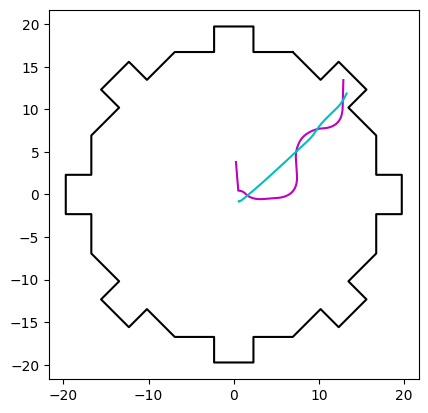

In [8]:
# plot both trajectories from a single trial
ax = plot_octagon.plot_octagon()
plot_trajectory.plot_trial_trajectory(ax, trial=trial)

<Axes: >

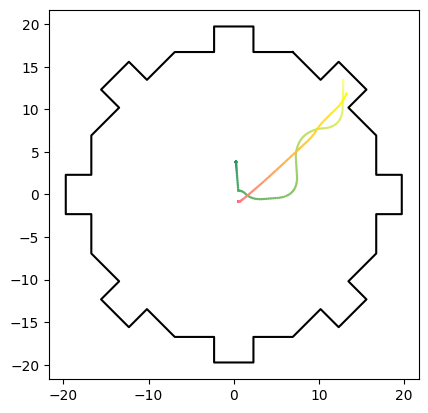

In [9]:
ax = plot_octagon.plot_octagon()
plot_trajectory.plot_trial_trajectory_colour_map(ax, trial=trial)

In [10]:
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=1)
trial_player_headangles = trajectory_headangle.extract_trial_player_headangles(trial=trial, player_id=1)
trial_player_headangles_smoothed = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trajectory(trial_player_headangles)


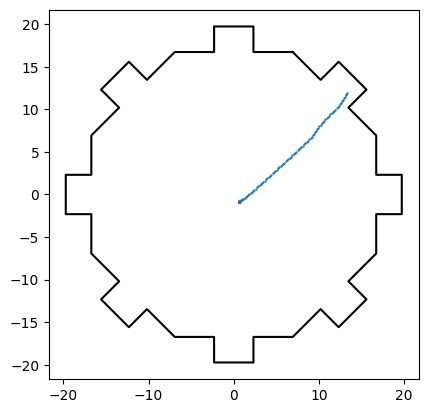

In [11]:
# plot only a single trajectory from this trial
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

3.1790618896484375 1.2268874645233154


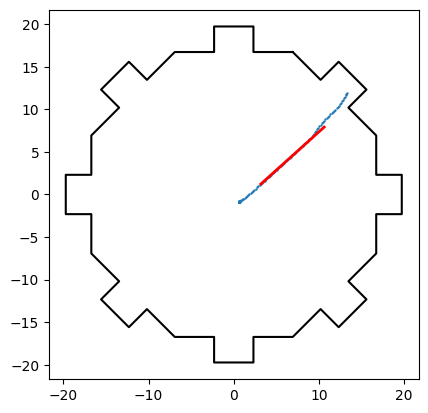

In [12]:
# example plotting head angle vector
start_index=100
x_start = trajectory[0,start_index]
y_start = trajectory[1,start_index]
x_gradient = trial_player_headangles_smoothed[0,start_index]
y_gradient = trial_player_headangles_smoothed[1,start_index]
vector_length = 10

start = [x_start, y_start]
print(x_start, y_start)
end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]

head_direction_vector_coordinates = np.array(list(zip(start,end)))

ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
ax.plot(head_direction_vector_coordinates[0,:], head_direction_vector_coordinates[1,:], c='r', linewidth=2)

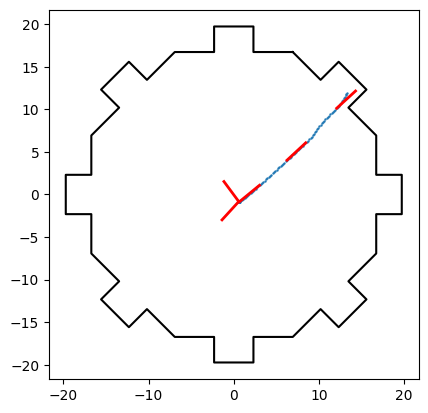

In [13]:
## Find the average head angle vector at equally-spaced points throughout the trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, trial_player_headangles_smoothed.shape[1], 40):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = trial_player_headangles_smoothed[0,time_index]
    y_gradient = trial_player_headangles_smoothed[1,time_index]
    vector_length = 3
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_head_angle_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_head_angle_vector_coordinates[0,:], this_head_angle_vector_coordinates[1,:], c='r', linewidth=2)

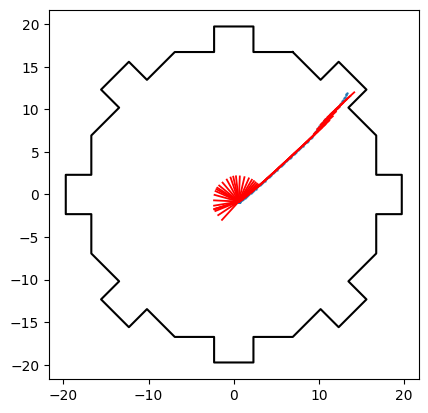

In [14]:
## Find the average head angle vector at all points throughout trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, trial_player_headangles_smoothed.shape[1],3):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = trial_player_headangles_smoothed[0,time_index]
    y_gradient = trial_player_headangles_smoothed[1,time_index]
    vector_length = 3
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_head_angle_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_head_angle_vector_coordinates[0,:], this_head_angle_vector_coordinates[1,:], c='r', linewidth=1.3)

In [15]:
# Find the angles between the head direction and the walls for each timepoint in the trajectory
thetas_trajectory = trajectory_headangle.head_angle_to_walls_throughout_trajectory(trajectory,
                                                                                   trial_player_headangles,
                                                                                   window_size=10, num_walls=8)

thetas_trajectory = np.rad2deg(thetas_trajectory)

smoothed_player_head_angles.shape:  (2, 162)
smoothed_player_head_angles
 [[0.7354029  0.73495859 0.73456829 0.73423254 0.73393787 0.73367633
  0.73344154 0.73322829 0.73304345 0.73288658]
 [0.67762736 0.67810994 0.6785332  0.6788968  0.67921557 0.67949825
  0.67975183 0.67998202 0.68018143 0.68035056]]
player_to_alcove_vectors.shape:  (2, 8, 172)
player_to_alcove_vectors
 [[ 8.17869474  8.01514627  7.83807088  7.69116927  7.53323842  7.38810683
   7.23957492  7.085773    6.94599487  6.78447915]
 [10.28418304 10.13436486  9.97182251  9.83683659  9.69139935  9.55764199
   9.42058326  9.27847482  9.14925815  8.99971367]]
dot_products_trajectory.shape:  (8, 162)
dot_products_trajectory
 [[  7.12289618   6.91073338   6.67882015   6.48658116   6.27825545
    6.08653708   5.88950047   5.68469934   5.49833241   5.28159948]
 [ 12.98347962  12.76301415  12.52381102  12.32530368  12.11147831
   11.9148801   11.71346373  11.50468532  11.3148715   11.09521392]
 [  8.17596172   7.94690463   7.70016

In [16]:
# compare the headangle vector and player-to-alcove vectors for a run of timepoints
smoothed_trial_player_headangles = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trajectory(trial_player_headangles,
                                                                                                              window_size=10)
player_to_alcove_vectors = trajectory_vectors.get_player_to_alcove_direction_vectors_for_trajectory(trajectory,
                                                                                     num_walls=8)
smoothed_trial_player_headangles[:,110:120]

array([[0.7354029 , 0.73495859, 0.73456829, 0.73423254, 0.73393787,
        0.73367633, 0.73344154, 0.73322829, 0.73304345, 0.73288658],
       [0.67762736, 0.67810994, 0.6785332 , 0.6788968 , 0.67921557,
        0.67949825, 0.67975183, 0.67998202, 0.68018143, 0.68035056]])

In [17]:
player_to_alcove_vectors[:,1,110:120]

array([[ 8.17869474,  8.01514627,  7.83807088,  7.69116927,  7.53323842,
         7.38810683,  7.23957492,  7.085773  ,  6.94599487,  6.78447915],
       [10.28418304, 10.13436486,  9.97182251,  9.83683659,  9.69139935,
         9.55764199,  9.42058326,  9.27847482,  9.14925815,  8.99971367]])

In [18]:
thetas_trajectory[:,110:120]

array([[ 64.11737083,  64.78559385,  65.52641008,  66.14741738,
         66.82831187,  67.46153804,  68.11905503,  68.80947415,
         69.44370995,  70.18859518],
       [  8.84723639,   8.96375875,   9.1026932 ,   9.221523  ,
          9.35924465,   9.49131271,   9.63399156,   9.78954338,
          9.93688006,  10.11795063],
       [ 53.56324514,  54.34906322,  55.20978442,  55.93836346,
         56.73057368,  57.47040505,  58.23763289,  59.04334819,
         59.78662393,  60.65536722],
       [104.82838745, 105.56546981, 106.35103151, 106.99961095,
        107.68720443, 108.31418346, 108.94897561, 109.5992919 ,
        110.1853821 , 110.8529707 ],
       [145.3982966 , 145.77233765, 146.16302099, 146.48309635,
        146.81649875, 147.11763456, 147.41867034, 147.72327925,
        147.99544607, 148.30050737],
       [178.70065952, 178.67368191, 178.65255458, 178.6341098 ,
        178.62027099, 178.60836251, 178.59907969, 178.59213409,
        178.58653529, 178.58505824],
       [14